explorando dataset

[dataset NY](https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)



In [277]:
# verificando a versao da biblioteca seaborn

# !pip install seaborn==0.10.1

# print(sns.__version__)

In [96]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np


In [97]:
# importando os dados e criando um dataframe
ny  = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\Biena\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [98]:
ny

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/1/2013,20:30:00,11/1/2013,21:00:00,11/1/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,40.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1006185.0,233271.0,40.806932,-73.920767,"(40.806931888, -73.920766811)"
1048571,833410354,11/1/2013,20:28:00,11/1/2013,20:31:00,11/1/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,75.0,FRONT OF,GROCERY/BODEGA,NaN,NaN,1013319.0,180075.0,40.660901,-73.895227,"(40.660901484, -73.895226891)"
1048572,961949188,11/1/2013,20:25:00,NaN,NaN,11/1/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,1.0,INSIDE,FAST FOOD,NaN,NaN,982953.0,203013.0,40.723909,-74.004681,"(40.723908621, -74.004680695)"
1048573,157608118,11/1/2013,20:25:00,11/1/2013,20:45:00,11/1/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,52.0,FRONT OF,STREET,NaN,NaN,1019388.0,259017.0,40.877554,-73.872939,"(40.877554428, -73.872939471)"


In [99]:
# retirando possiveis erros das coluna

ny['CMPLNT_FR_DT'] = pd.to_datetime(ny['CMPLNT_FR_DT'],errors='coerce')


In [3]:
# column = list(colunas.Column)
# description  = list(colunas.Description)
# for x,y in zip(column , description):
#  agr = (x ,y)
#  print(agr)
    
# CMPLNT_NUM - ID persistente gerado aleatoriamente para cada reclamação 0
# CMPLNT_FR_DT - Data exata de ocorrência do evento relatado 1
# CMPLNT_FR_TM - Hora exata de ocorrência do evento relatado 2
# CMPLNT_TO_DT - Data final da ocorrência do evento relatado, se a hora exata da ocorrência for desconhecida  3
# CMPLNT_TO_TM - Hora de término da ocorrência do evento relatado, se a hora exata da ocorrência for desconhecida 4
# RPT_DT       - Data em que o evento foi relatado à polícia 5
# KY_CD        - Código de classificação de ofensa de três dígitos  6
# OFNS_DESC    - Descrição da ofensa correspondente ao código-chave 7
# PD_CD        - Código de classificação interna de três dígitos  8
# PD_DESC      - Descrição da classificação interna correspondente ao código 9
# CRM_ATPT_CPTD_CD - Indicador de se o crime foi concluído ou tentado com sucesso, mas falhou ou foi interrompido prematuramente  10
# LAW_CAT_CD   - Nível de ofensa: crime, contravenção, violação 11
# JURIS_DESC   - Jurisdição responsável pelo incidente 12
# BORO_NM      - O nome do bairro em que ocorreu o incidente 13
# ADDR_PCT_CD  - O distrito em que ocorreu o incidente  14
# LOC_OF_OCCUR_DESC - Local específico de ocorrência dentro ou ao redor das instalações 15
# PREM_TYP_DESC' -  descrição específica das instalações 16
# PARKS_NM       - Nome do parque, playground ou área verde da ocorrência em NYC, se aplicável (parques estaduais não incluídos) 17 
# HADEVELOPT     - Nome do conjunto habitacional NYCHA de ocorrência, se aplicável  18
# X_COORD_CD     - Coordenada X para Sistema de Coordenadas de Plano do Estado de Nova York, Zona de Long Island 19
# Y_COORD_CD     - Coordenada Y para o sistema de coordenadas de avião do estado de Nova York, Zona de Long Island 20
# Latitude       - Coordenada de latitude para Sistema de Coordenadas Globais 21
# Longitude      - Coordenada de longitude para Sistema de Coordenadas Globais 22



## Criando um novo dataframe
Por meio do metodo iloc ,selecinamos as colunas  que tem informaçoes relevantes a cerca dos crimes praticados  .

In [100]:
# selecinando as colunas consideradas revelevantes do dataframe

select_ny = ny.iloc[:, [1,2,3,4,5,7,10,11,12,13,15,16]]

# renomenado as colunas

select_ny.columns = ['data_da_ocorrencia','hora_da_ocorrencia','data_final_da_ocorrencia', 
                     'hora_termino_da_ocorrencia','data_comunicacao_policia',
                     'descricao_da_ofensa','conclusao','nivel_de_ofensa','jurisdicao','bairro','local_da_ocorrencia'
                    ,'descricao_das_intalacoes']

# alterando os dados da coluna conclusao

new_conclusao = {'ATTEMPTED': 'nao_concluido', 'COMPLETED': 'concluido' }
select_ny.loc[:,'conclusao'] = select_ny['conclusao'].map(new_conclusao)


# alterando os dados da coluna nivel_de_ofensa
new_nivel_de_ofensa = {'MISDEMEANOR': "contravencao", 'FELONY': "crime", 'VIOLATION': "violacao" }
select_ny.loc[:,'nivel_de_ofensa'] = select_ny['nivel_de_ofensa'].map(new_nivel_de_ofensa)


# alterando os dados da coluna local_da_ocorrencia
new_local_da_ocorrencia = {'INSIDE': "dentro", 'FRONT OF': "em_frente", 'OPPOSITE OF': "oposto", 
                           'REAR OF': "atras", 'OUTSIDE': "fora" }
select_ny.loc[:,'local_da_ocorrencia'] = select_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)



C:\Users\Biena\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


 # Incluindo a duração de cada ocorrencia no dataframe e reordenando as colunas

In [101]:
select_ny

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,23:45:00,NaN,NaN,12/31/2015,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,23:36:00,NaN,NaN,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,23:30:00,NaN,NaN,12/31/2015,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,23:30:00,NaN,NaN,12/31/2015,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,23:25:00,12/31/2015,23:30:00,12/31/2015,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2013-11-01,20:30:00,11/1/2013,21:00:00,11/1/2013,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
1048571,2013-11-01,20:28:00,11/1/2013,20:31:00,11/1/2013,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BROOKLYN,em_frente,GROCERY/BODEGA
1048572,2013-11-01,20:25:00,NaN,NaN,11/1/2013,CRIMINAL MISCHIEF & RELATED OF,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,dentro,FAST FOOD
1048573,2013-11-01,20:25:00,11/1/2013,20:45:00,11/1/2013,DANGEROUS DRUGS,concluido,contravencao,N.Y. POLICE DEPT,BRONX,em_frente,STREET


In [104]:
# convertendo as algumas colunas para formato datetime 

data_da_ocorrencia = pd.to_datetime(select_ny["data_da_ocorrencia"])

data_final_da_ocorrencia = pd.to_datetime(select_ny["data_final_da_ocorrencia"])

data_comunicacao_policia = pd.to_datetime(select_ny["data_comunicacao_policia"])

hora_da_ocorrencia = pd.to_datetime(select_ny["hora_da_ocorrencia"])

hora_termino_da_ocorrencia = pd.to_datetime(select_ny["hora_termino_da_ocorrencia"])


# criando a coluna duração da ocorrencia

select_ny['duracao_da_ocorrencia'] = hora_termino_da_ocorrencia - hora_da_ocorrencia



# reoordenando as colunas
select_ny = select_ny[['data_da_ocorrencia', 'data_final_da_ocorrencia', 'data_comunicacao_policia','hora_da_ocorrencia',
                       'hora_termino_da_ocorrencia', 'duracao_da_ocorrencia','descricao_da_ofensa',
                       'conclusao', 'nivel_de_ofensa', 'jurisdicao','bairro', 'local_da_ocorrencia', 'descricao_das_intalacoes']]
select_ny

<ipython-input-104-a4ba6c18222b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_ny['duracao_da_ocorrencia'] = hora_termino_da_ocorrencia - hora_da_ocorrencia


,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaN,12/31/2015,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaN,12/31/2015,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaN,12/31/2015,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaN,12/31/2015,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,12/31/2015,12/31/2015,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2013-11-01,11/1/2013,11/1/2013,20:30:00,21:00:00,00:30:00,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
1048571,2013-11-01,11/1/2013,11/1/2013,20:28:00,20:31:00,00:03:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BROOKLYN,em_frente,GROCERY/BODEGA
1048572,2013-11-01,NaN,11/1/2013,20:25:00,NaN,NaT,CRIMINAL MISCHIEF & RELATED OF,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,dentro,FAST FOOD
1048573,2013-11-01,11/1/2013,11/1/2013,20:25:00,20:45:00,00:20:00,DANGEROUS DRUGS,concluido,contravencao,N.Y. POLICE DEPT,BRONX,em_frente,STREET


Tratando os dados e excluindo valores nulos

In [73]:
df = select_ny.dropna(subset = ['data_da_ocorrencia','data_final_da_ocorrencia' ,'hora_termino_da_ocorrencia','descricao_da_ofensa'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840211 entries, 4 to 1048574
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   data_da_ocorrencia          840211 non-null  object         
 1   data_final_da_ocorrencia    840211 non-null  object         
 2   data_comunicacao_policia    840211 non-null  object         
 3   hora _da_ocorrencia         840211 non-null  object         
 4   hora_termino_da_ocorrencia  840211 non-null  object         
 5   duracao_da_ocorrencia       840211 non-null  timedelta64[ns]
 6   descricao_da_ofensa         840211 non-null  object         
 7   conclusao                   840211 non-null  object         
 8   nivel_de_ofensa             840211 non-null  object         
 9   jurisdicao                  840211 non-null  object         
 10  bairro                      840211 non-null  object         
 11  local_da_ocorrencia      

# Gerando algumas vizualizações a partir de select_ny 

# Delitos concluidos x delitos não concluidos

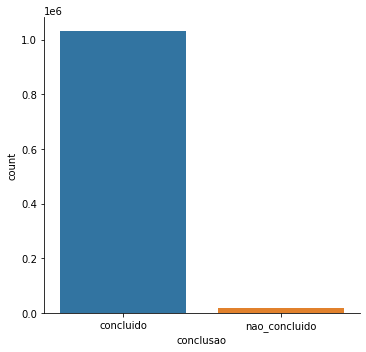

In [8]:
sns.catplot(x="conclusao", kind="count", data = select_ny)
# obtendo os numeros de crimes concluidos e nao concluidos 

In [127]:
delitos = select_ny.conclusao.value_counts().to_frame().reset_index()
delitos.columns = ['conclusao' , 'quantidade']
delitos

,conclusao,quantidade
0,concluido,1029816
1,nao_concluido,18758


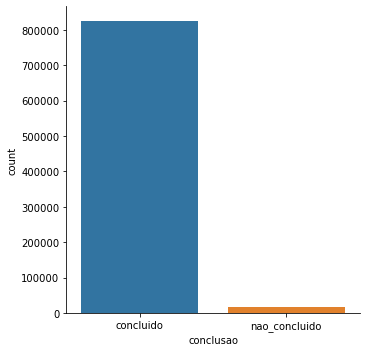

In [75]:
sns.catplot(x="conclusao", kind="count", data = df)
# obtendo os numeros de crimes concluidos e nao concluidos 

In [128]:
delitos_df = df.conclusao.value_counts().to_frame().reset_index()
delitos_df.columns = ['conclusao' , 'quantidade']
delitos_df

,conclusao,quantidade
0,concluido,824827
1,nao_concluido,15384


# Verificando a porcentagem da redução dos delitos após excluir alguns valores nulos do dataframe .

In [129]:
# redução do numero de registros
reducao = 100 - ((delitos_df.quantidade / delitos.quantidade) * 100)
reducao
delitos['reducao_%'] = reducao

In [130]:
delitos['quantidade_drop'] = delitos_df.quantidade

In [131]:
delitos = delitos[['conclusao', 'quantidade','quantidade_drop', 'reducao_%']]

In [194]:
delitos

,conclusao,quantidade,quantidade_drop,reducao_%
0,concluido,1029816,824827,19.905401
1,nao_concluido,18758,15384,17.986992


# Quantidade de delitos cometidos por bairros
delitos_concluidos_por_bairros -- dataframe

In [10]:
delitos_concluidos_por_bairros = select_ny.query('conclusao == "concluido"')
# delitos_concluidos_por_bairros -- dataFrame a serr utilizados pra demais insights
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros.bairro.value_counts()
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros_df.to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'delitos_concluidos']
delitos_concluidos_por_bairros_df

,bairro,delitos_concluidos
0,BROOKLYN,309645
1,MANHATTAN,240259
2,BRONX,223833
3,QUEENS,208015
4,STATEN ISLAND,48064


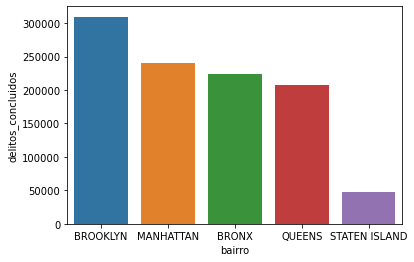

In [11]:
sns.barplot(x = 'bairro' , y = 'delitos_concluidos' , data = delitos_concluidos_por_bairros_df)

## visualizando o comportamento dos delitos ao longo dos anos 

In [12]:
# como gerar uma visualização do delito = crime ao logo de 5 anos

## Delitos 2009 / 2015 (timeseries) ???

In [271]:
select_ny[(select_ny['data_da_ocorrencia'] > '2009-01-01') & (select_ny['data_da_ocorrencia'] < '2009-12-31')]
# coverter a coluna para date_time 
# select_ny['data_da_ocorrencia'].year

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora _da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes


In [13]:
crimes_2009_2015 = delitos_concluidos_por_bairros[['data_da_ocorrencia' , 'nivel_de_ofensa']]
crimes_2009_2015

,data_da_ocorrencia,nivel_de_ofensa
0,12/31/2015,crime
1,12/31/2015,crime
2,12/31/2015,crime
3,12/31/2015,contravencao
4,12/31/2015,contravencao
...,...,...
1048570,11/1/2013,contravencao
1048571,11/1/2013,contravencao
1048572,11/1/2013,crime
1048573,11/1/2013,contravencao


In [14]:
crimes_2009_2015.nivel_de_ofensa.value_counts()

contravencao    580281
crime           314579
violacao        134956
Name: nivel_de_ofensa, dtype: int64

In [15]:
crimes_2009 = crimes_2009_2015.query('data_da_ocorrencia >= "1/1/2009" & data_da_ocorrencia < "1/1/2010"') 

In [16]:
crimes_2009

,data_da_ocorrencia,nivel_de_ofensa
62992,1/1/2009,crime
90930,1/1/2009,contravencao
90931,1/1/2009,contravencao
95134,1/1/2009,crime
110075,1/1/2009,crime
111579,1/1/2009,crime
111580,1/1/2009,contravencao
115648,1/1/2009,violacao
158167,1/1/2009,contravencao
202124,1/1/2009,contravencao


## Descrição da ofensa - Tipos de delitos mais comuns

In [17]:
delitos_concluidos_por_bairros

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora _da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,12/31/2015,NaN,12/31/2015,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,12/31/2015,NaN,12/31/2015,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,12/31/2015,NaN,12/31/2015,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,12/31/2015,NaN,12/31/2015,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,12/31/2015,12/31/2015,12/31/2015,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11/1/2013,11/1/2013,11/1/2013,20:30:00,21:00:00,00:30:00,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
1048571,11/1/2013,11/1/2013,11/1/2013,20:28:00,20:31:00,00:03:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BROOKLYN,em_frente,GROCERY/BODEGA
1048572,11/1/2013,NaN,11/1/2013,20:25:00,NaN,NaT,CRIMINAL MISCHIEF & RELATED OF,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,dentro,FAST FOOD
1048573,11/1/2013,11/1/2013,11/1/2013,20:25:00,20:45:00,00:20:00,DANGEROUS DRUGS,concluido,contravencao,N.Y. POLICE DEPT,BRONX,em_frente,STREET


In [18]:
tipos_de_delitos = delitos_concluidos_por_bairros.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

In [19]:
principais_delitos = tipos_de_delitos.head(19)
principais_delitos

,descricao_da_ofensa,quantidade
0,PETIT LARCENY,177689
1,HARRASSMENT 2,132854
2,ASSAULT 3 & RELATED OFFENSES,113732
3,CRIMINAL MISCHIEF & RELATED OF,102419
4,GRAND LARCENY,94360
5,DANGEROUS DRUGS,56493
6,OFF. AGNST PUB ORD SENSBLTY &,44641
7,FELONY ASSAULT,41566
8,ROBBERY,32620
9,BURGLARY,32229


## Nivel  de ofensa  dos delitos mais comuns
relacionar os tipos de delitos mais comuns com o nivel de ofensa 

In [20]:
# separar crime e a descrição dos crimes 
# separar contravenção e ver a descrição da contravencção
# separar violação e ver a descrição da violação

## Detalhando os crimes 

In [21]:
crimes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "crime"').descricao_da_ofensa.value_counts()
crimes_df = crimes_df.to_frame().reset_index()
crimes_df.columns = ['tipo_crimes','quantidade']
crimes_df

,tipo_crimes,quantidade
0,GRAND LARCENY,94360
1,FELONY ASSAULT,41566
2,ROBBERY,32620
3,BURGLARY,32229
4,MISCELLANEOUS PENAL LAW,27218
5,CRIMINAL MISCHIEF & RELATED OF,18943
6,GRAND LARCENY OF MOTOR VEHICLE,15770
7,FORGERY,10479
8,THEFT-FRAUD,10144
9,DANGEROUS WEAPONS,10119


## Detalhando as contravenções 

In [22]:
contravencoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "contravencao"').descricao_da_ofensa.value_counts()
contravencoes_df = contravencoes_df.to_frame().reset_index()
contravencoes_df.columns = ['tipo_contravencao','quantidade']
contravencoes_df

,tipo_contravencao,quantidade
0,PETIT LARCENY,177689
1,ASSAULT 3 & RELATED OFFENSES,113732
2,CRIMINAL MISCHIEF & RELATED OF,83476
3,DANGEROUS DRUGS,46976
4,OFF. AGNST PUB ORD SENSBLTY &,44641
5,OFFENSES AGAINST PUBLIC ADMINI,21199
6,INTOXICATED & IMPAIRED DRIVING,15088
7,VEHICLE AND TRAFFIC LAWS,13005
8,DANGEROUS WEAPONS,12679
9,CRIMINAL TRESPASS,10227


## Detalhando as violações

In [23]:
violacoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "violacao"').descricao_da_ofensa.value_counts()
violacoes_df = violacoes_df.to_frame().reset_index()
violacoes_df.columns = ['tipo_violacao','quantidade']
violacoes_df

,tipo_violacao,quantidade
0,HARRASSMENT 2,132854
1,MISCELLANEOUS PENAL LAW,1716
2,ADMINISTRATIVE CODE,184
3,DISORDERLY CONDUCT,121
4,OTHER STATE LAWS,31
5,"LOITERING/GAMBLING (CARDS, DIC",19
6,UNLAWFUL POSS. WEAP. ON SCHOOL,8
7,NEW YORK CITY HEALTH CODE,7
8,NYS LAWS-UNCLASSIFIED VIOLATION,6
9,OTHER TRAFFIC INFRACTION,3


# Relação entre o  horario e os tipos de delitos 

In [ ]:
# verificar quais maiores ocorrencias de delitos - dia x noite

In [ ]:
# 

## Qual departamento e responsável pelos delitos

In [24]:
dep_resp_delitos = delitos_concluidos_por_bairros[['jurisdicao','descricao_da_ofensa','nivel_de_ofensa','local_da_ocorrencia']]
dep_resp_delitos

,jurisdicao,descricao_da_ofensa,nivel_de_ofensa,local_da_ocorrencia
0,N.Y. POLICE DEPT,FORGERY,crime,dentro
1,N.Y. POLICE DEPT,MURDER & NON-NEGL. MANSLAUGHTER,crime,fora
2,N.Y. POLICE DEPT,DANGEROUS DRUGS,crime,NaN
3,N.Y. POLICE DEPT,ASSAULT 3 & RELATED OFFENSES,contravencao,dentro
4,N.Y. POLICE DEPT,ASSAULT 3 & RELATED OFFENSES,contravencao,em_frente
...,...,...,...,...
1048570,N.Y. POLICE DEPT,PETIT LARCENY,contravencao,dentro
1048571,N.Y. POLICE DEPT,ASSAULT 3 & RELATED OFFENSES,contravencao,em_frente
1048572,N.Y. POLICE DEPT,CRIMINAL MISCHIEF & RELATED OF,crime,dentro
1048573,N.Y. POLICE DEPT,DANGEROUS DRUGS,contravencao,em_frente


jurisdição

In [197]:
jurisdicao_crimes = dep_resp_delitos.query('nivel_de_ofensa == "crime"')
jurisdicao_crimes.jurisdicao.value_counts()


N.Y. POLICE DEPT                279700
N.Y. HOUSING POLICE              19068
N.Y. TRANSIT POLICE              10456
DEPT OF CORRECTIONS               1788
OTHER                             1465
PORT AUTHORITY                    1380
N.Y. STATE POLICE                  264
HEALTH & HOSP CORP                 177
TRI-BORO BRDG TUNNL                 63
POLICE DEPT NYC                     44
METRO NORTH                         37
NEW YORK CITY SHERIFF OFFICE        28
LONG ISLAND RAILRD                  24
U.S. PARK POLICE                    19
N.Y. STATE PARKS                    16
STATN IS RAPID TRANS                16
AMTRACK                             13
NYC PARKS                           13
NYS DEPT TAX AND FINANCE             8
Name: jurisdicao, dtype: int64

In [196]:
jurisdicao_contravencao = dep_resp_delitos.query('nivel_de_ofensa == "contravencao"')
jurisdicao_contravencao.jurisdicao.value_counts()


N.Y. POLICE DEPT                514317
N.Y. HOUSING POLICE              46262
N.Y. TRANSIT POLICE              11612
PORT AUTHORITY                    4120
OTHER                             1262
DEPT OF CORRECTIONS               1213
TRI-BORO BRDG TUNNL                503
N.Y. STATE POLICE                  345
HEALTH & HOSP CORP                 252
POLICE DEPT NYC                     79
METRO NORTH                         70
STATN IS RAPID TRANS                58
NYC PARKS                           57
N.Y. STATE PARKS                    39
LONG ISLAND RAILRD                  27
U.S. PARK POLICE                    21
NEW YORK CITY SHERIFF OFFICE        17
NYS DEPT TAX AND FINANCE            14
AMTRACK                             12
CONRAIL                              1
Name: jurisdicao, dtype: int64

In [198]:
jurisdicao_violacao = dep_resp_delitos.query('nivel_de_ofensa == "violacao" ')
jurisdicao_violacao.jurisdicao.value_counts()


N.Y. POLICE DEPT       119949
N.Y. HOUSING POLICE     13072
N.Y. TRANSIT POLICE      1685
N.Y. STATE POLICE          49
OTHER                      46
PORT AUTHORITY             44
POLICE DEPT NYC            34
HEALTH & HOSP CORP         25
METRO NORTH                23
DEPT OF CORRECTIONS        18
TRI-BORO BRDG TUNNL         8
AMTRACK                     2
NYC PARKS                   1
Name: jurisdicao, dtype: int64

## Local da ocorrencia 
#### Neste tópico , podemos separar o local onde ocorreu o delito , se dentro ou fora do estabelecimento em questão 

In [28]:
# total de delitos concluidos 
total_registros = len(delitos_concluidos_por_bairros.local_da_ocorrencia)
total_registros

1029816

In [29]:
# delitos que aconteceram na parte de dentro dos estabelecimentos
total_delitos_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia == "dentro" ')
total_delitos_dentro = sum(total_delitos_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_dentro

539948

In [30]:
#  delitos que aconteceram na parte de fora dos estabelecimentos
total_delitos_fora_do_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia != "dentro" ')
total_delitos_fora_do_local =  sum(total_delitos_fora_do_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_fora_do_local

275802

In [31]:
#  delitos que não tiveram registro se dentro ou fora do local da ocorrencia
delitos_sem_registro_do_local = total_registros - (total_delitos_dentro + total_delitos_fora_do_local)
delitos_sem_registro_do_local

214066

In [32]:
# crinado um DataFrame para visualizar os dados obtidos acima a respeito do local dos delitos


dados_local_da_ocorrencia = {
    'local' : ['dentro','fora', 'sem_registro'],
    'total' : [total_delitos_dentro, total_delitos_fora_do_local, delitos_sem_registro_do_local ]

}

dados_local_da_ocorrencia_df = pd.DataFrame(dados_local_da_ocorrencia)

In [33]:
dados_local_da_ocorrencia_df

,local,total
0,dentro,539948
1,fora,275802
2,sem_registro,214066


### Visualisando local onde acontecem os delitos 

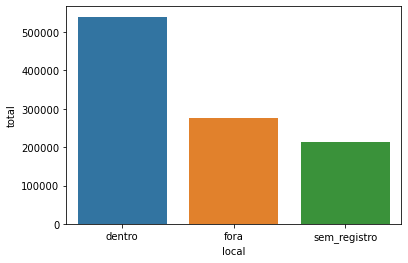

In [34]:
sns.barplot(x = 'local' , y = 'total' , data = dados_local_da_ocorrencia_df)

In [35]:
dados_local_da_ocorrencia_df

,local,total
0,dentro,539948
1,fora,275802
2,sem_registro,214066


## Verificando e visualizando quais os tipos de ofensa e suas ocorrencias

In [36]:
# duração media do tipo nivel_de_ofensa x  descrição_da_ofensa 

In [37]:
nivel_de_ofensa = select_ny.query('conclusao == "concluido" ')
nivel_de_ofensa_df = nivel_de_ofensa.nivel_de_ofensa.value_counts()
nivel_de_ofensa_df = nivel_de_ofensa_df.to_frame().reset_index()
nivel_de_ofensa_df.columns = ['ofensa' , 'quantidade']
nivel_de_ofensa_df
# visualizando os tipos de crimes e suas quantidades

,ofensa,quantidade
0,contravencao,580281
1,crime,314579
2,violacao,134956


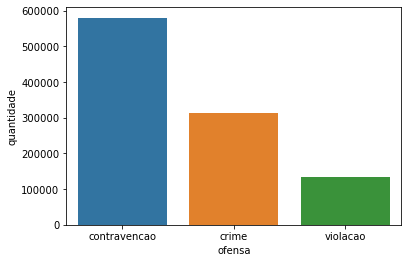

In [38]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = nivel_de_ofensa_df)

### Duração media de cada tipo de ofensa

In [39]:
nivel_de_ofensa

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora _da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,12/31/2015,NaN,12/31/2015,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,12/31/2015,NaN,12/31/2015,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,12/31/2015,NaN,12/31/2015,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,12/31/2015,NaN,12/31/2015,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,12/31/2015,12/31/2015,12/31/2015,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11/1/2013,11/1/2013,11/1/2013,20:30:00,21:00:00,00:30:00,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
1048571,11/1/2013,11/1/2013,11/1/2013,20:28:00,20:31:00,00:03:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BROOKLYN,em_frente,GROCERY/BODEGA
1048572,11/1/2013,NaN,11/1/2013,20:25:00,NaN,NaT,CRIMINAL MISCHIEF & RELATED OF,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,dentro,FAST FOOD
1048573,11/1/2013,11/1/2013,11/1/2013,20:25:00,20:45:00,00:20:00,DANGEROUS DRUGS,concluido,contravencao,N.Y. POLICE DEPT,BRONX,em_frente,STREET


In [40]:
duracao_crimes = nivel_de_ofensa.query('nivel_de_ofensa == "crime"')
duracao_crimes = duracao_crimes.duracao_da_ocorrencia.mean()
duracao_crimes

Timedelta('0 days 00:06:54.867443')

In [275]:
duracao_contravencao = nivel_de_ofensa.query('nivel_de_ofensa == "contravencao"')
duracao_contravencao =  duracao_contravencao.duracao_da_ocorrencia.mean()
duracao_contravencao

Timedelta('-1 days +23:53:52.873507')

In [42]:
duracao_violacao = nivel_de_ofensa.query('nivel_de_ofensa == "violacao"')
duracao_violacao =  duracao_violacao.duracao_da_ocorrencia.mean()
duracao_violacao

Timedelta('0 days 00:15:02.842302')

### Distribuição dos tipos de ofensa por  bairros

#### BROOKLYN

In [43]:
brooklyn = nivel_de_ofensa.query('bairro == "BROOKLYN" ')
brooklyn_df = brooklyn.nivel_de_ofensa.value_counts().to_frame().reset_index()
brooklyn_df.columns = ['ofensa' , 'quantidade']
brooklyn_df

,ofensa,quantidade
0,contravencao,166048
1,crime,101013
2,violacao,42584


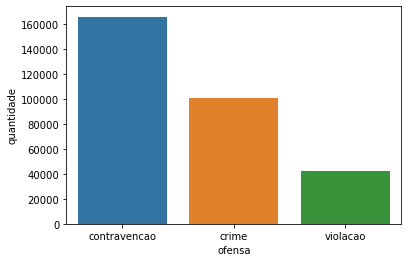

In [44]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = brooklyn_df)

#### MANHATTAN

In [45]:
manhattan = nivel_de_ofensa.query('bairro == "MANHATTAN" ')
manhattan_df = manhattan.nivel_de_ofensa.value_counts().to_frame().reset_index()
manhattan_df.columns = ['ofensa' , 'quantidade']
manhattan_df

,ofensa,quantidade
0,contravencao,139701
1,crime,73723
2,violacao,26835


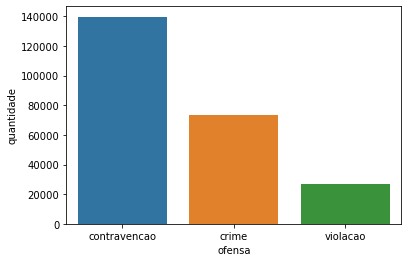

In [46]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = manhattan_df)

#### BRONX

In [47]:
bronx = nivel_de_ofensa.query('bairro == "BRONX" ')
bronx_df = bronx.nivel_de_ofensa.value_counts().to_frame().reset_index()
bronx_df.columns = ['ofensa' , 'quantidade']
bronx_df

,ofensa,quantidade
0,contravencao,134965
1,crime,60656
2,violacao,28212


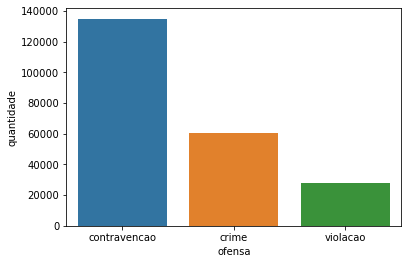

In [48]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = bronx_df)

#### QUEENS

In [49]:
queens = nivel_de_ofensa.query('bairro == "QUEENS"')
queens_df = queens.nivel_de_ofensa.value_counts().to_frame().reset_index()
queens_df.columns = ['ofensa' , 'quantidade']
queens_df

,ofensa,quantidade
0,contravencao,111774
1,crime,68331
2,violacao,27910


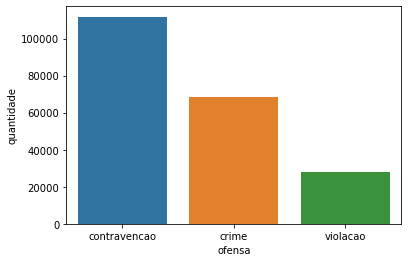

In [50]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = queens_df)

#### STATEN ISLAND

In [51]:
staten_island = nivel_de_ofensa.query('bairro == "STATEN ISLAND"')
staten_island_df = staten_island.nivel_de_ofensa.value_counts().to_frame().reset_index()
staten_island_df.columns = ['ofensa' , 'quantidade']
staten_island_df

,ofensa,quantidade
0,contravencao,27793
1,crime,10856
2,violacao,9415


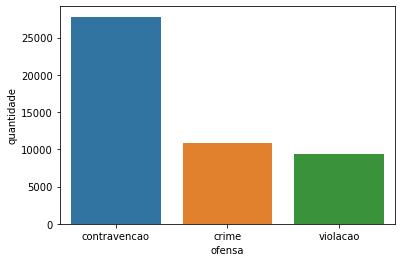

In [52]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = staten_island_df)

## Comparando as ocorrencias de contravenção em cada bairro

In [230]:
# gerando as variaveis contravenção de cada bairro

# BROOKLYN
contravencao_brooklyn = sum(brooklyn_df.query('ofensa == "contravencao"').quantidade)
contravencao_brooklyn

# MANHATTAN
contravencao_manhattan = sum(manhattan_df.query('ofensa == "contravencao"').quantidade)
contravencao_manhattan

# BRONX
contravencao_bronx = sum(bronx_df.query('ofensa == "contravencao"').quantidade)
contravencao_bronx

# queens
contravencao_queens = sum(queens_df.query('ofensa == "contravencao"').quantidade)
contravencao_queens


# staten_island
contravencao_staten_island = sum(staten_island_df.query('ofensa == "contravencao"').quantidade)
contravencao_staten_island


27793

In [235]:

contravencao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_contravencao' : [contravencao_brooklyn, contravencao_manhattan, contravencao_bronx, contravencao_queens, contravencao_staten_island ]

}

contravencao_por_bairros_df = pd.DataFrame(contravencao_por_bairros)

In [236]:
contravencao_por_bairros_df

,bairro,total_contravencao
0,brooklyn,166048
1,manhattan,139701
2,bronx,134965
3,queens,111774
4,staten_island,27793


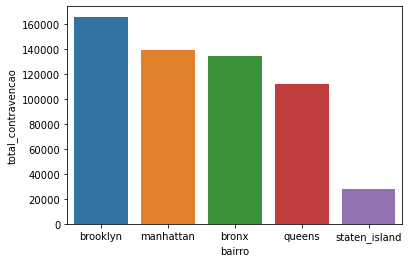

In [238]:
sns.barplot(x = 'bairro' , y = 'total_contravencao' , data = contravencao_por_bairros_df)

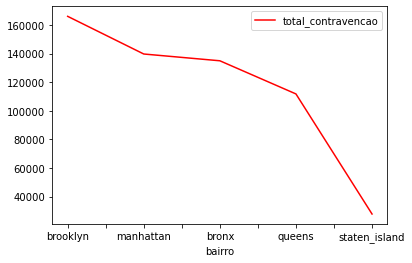

In [239]:
contravencao_por_bairros_df.plot(x = 'bairro' , y = 'total_contravencao' , color = 'red' )

## Comparando as ocorrencias de crimes em cada bairro

In [53]:
# comparar delitos (crime x contravenção x violaçao ) entre os  bairros 
# criar variaveis e por meio de um dicionario criar um dataFrame e visualizar as comparaçoes

In [257]:
# gerando as variaveis crimes de cada bairro

# BROOKLYN
crimes_brooklyn = sum(brooklyn_df.query('ofensa == "crime"').quantidade)
crimes_brooklyn

# MANHATTAN
crimes_manhattan = sum(manhattan_df.query('ofensa == "crime"').quantidade)
crimes_manhattan

# BRONX
crimes_bronx = sum(bronx_df.query('ofensa == "crime"').quantidade)
crimes_bronx

# queens
crimes_queens = sum(queens_df.query('ofensa == "crime"').quantidade)
crimes_queens


# staten_island
crimes_staten_island = sum(staten_island_df.query('ofensa == "crime"').quantidade)
crimes_staten_island


10856

In [258]:

crimes_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_crimes' : [crimes_brooklyn, crimes_manhattan, crimes_bronx, crimes_queens, crimes_staten_island ]

}

crimes_por_bairros_df = pd.DataFrame(crimes_por_bairros)

In [215]:
crimes_por_bairros_df

,bairro,total_crimes
0,brooklyn,101013
1,manhattan,73723
2,bronx,60656
3,queens,68331
4,staten_island,10856


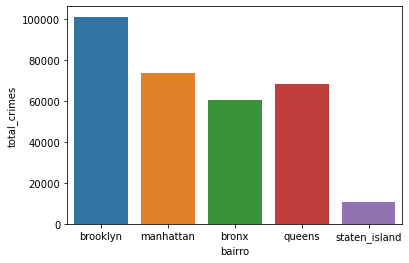

In [259]:
sns.barplot(x = 'bairro' , y = 'total_crimes' , data = crimes_por_bairros_df)

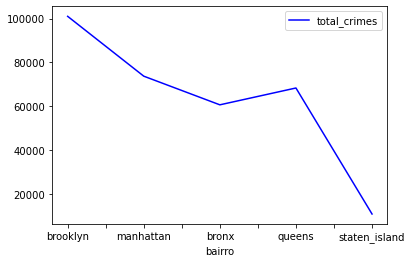

In [234]:
crimes_por_bairros_df.plot(x = 'bairro' , y = 'total_crimes' , color = 'blue' )

## Comparando as ocorrencias de violação em cada bairro

In [240]:
# gerando as variaveis violação de cada bairro

# BROOKLYN
violacao_brooklyn = sum(brooklyn_df.query('ofensa == "violacao"').quantidade)
violacao_brooklyn

# MANHATTAN
violacao_manhattan = sum(manhattan_df.query('ofensa == "violacao"').quantidade)
violacao_manhattan

# BRONX
violacao_bronx = sum(bronx_df.query('ofensa == "violacao"').quantidade)
violacao_bronx

# queens
violacao_queens = sum(queens_df.query('ofensa == "violacao"').quantidade)
violacao_queens


# staten_island
violacao_staten_island = sum(staten_island_df.query('ofensa == "violacao"').quantidade)
violacao_staten_island

9415

In [241]:
violacao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_violacao' : [violacao_brooklyn, violacao_manhattan, violacao_bronx, violacao_queens, violacao_staten_island ]

}

violacao_por_bairros_df = pd.DataFrame(violacao_por_bairros)

In [242]:
violacao_por_bairros_df

,bairro,total_violacao
0,brooklyn,42584
1,manhattan,26835
2,bronx,28212
3,queens,27910
4,staten_island,9415


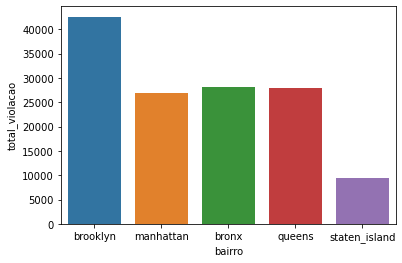

In [243]:
sns.barplot(x = 'bairro' , y = 'total_violacao' , data = violacao_por_bairros_df)

# Crimes não concluidos por bairro

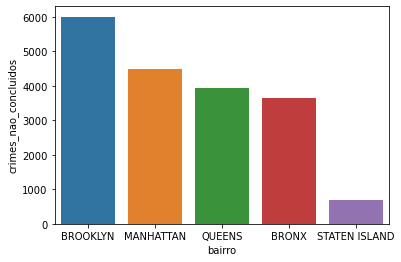

In [54]:
crimes_nao_concluidos_por_bairros = select_ny.query('conclusao == "nao_concluido" ').bairro.value_counts()
crimes_nao_concluidos_por_bairros_df = pd.DataFrame(crimes_nao_concluidos_por_bairros).reset_index()
crimes_nao_concluidos_por_bairros_df.columns = ['bairro' , 'crimes_nao_concluidos']
sns.barplot(x = 'bairro' , y = 'crimes_nao_concluidos' , data = crimes_nao_concluidos_por_bairros_df)

In [55]:
crimes_nao_concluidos_por_bairros_df

,bairro,crimes_nao_concluidos
0,BROOKLYN,6003
1,MANHATTAN,4489
2,QUEENS,3943
3,BRONX,3644
4,STATEN ISLAND,679


## Detalhando 

In [56]:
crimes_falhos_df = select_ny.query('conclusao == "nao_concluido" ')
crimes_falhos_df
# crimes_falhos_df.dropna(subset = ['data_final_da_ocorrencia' ,'hora_termino_da_ocorrencia'])
# não podem ser excluidos pois muitos registros seriam peridos 

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora _da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
5,12/31/2015,12/31/2015,12/31/2015,23:18:00,23:25:00,00:07:00,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,em_frente,DRUG STORE
154,12/31/2015,NaN,12/31/2015,18:55:00,NaN,NaT,GRAND LARCENY OF MOTOR VEHICLE,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,NaN,STREET
283,12/31/2015,12/31/2015,12/31/2015,15:27:00,15:30:00,00:03:00,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BRONX,oposto,STREET
284,12/31/2015,12/31/2015,12/31/2015,15:25:00,15:25:00,00:00:00,PETIT LARCENY,nao_concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,CHAIN STORE
483,12/31/2015,12/31/2015,12/31/2015,8:50:00,9:15:00,00:25:00,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BRONX,em_frente,STORE UNCLASSIFIED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048381,10/21/2013,10/21/2013,11/2/2013,9:47:00,10:32:00,00:45:00,CRIMINAL TRESPASS,nao_concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,RESIDENCE - APT. HOUSE
1048509,11/1/2013,11/1/2013,11/1/2013,21:30:00,21:39:00,00:09:00,ROBBERY,nao_concluido,crime,N.Y. POLICE DEPT,QUEENS,NaN,STREET
1048548,11/1/2013,11/1/2013,11/1/2013,20:30:00,20:35:00,00:05:00,BURGLARY,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,dentro,RESIDENCE - APT. HOUSE
1048556,11/1/2013,11/1/2013,11/1/2013,20:40:00,20:45:00,00:05:00,BURGLARY,nao_concluido,crime,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE


In [245]:
descricao_crimes_falhos = crimes_falhos_df.descricao_da_ofensa.value_counts().to_frame().reset_index()
descricao_crimes_falhos.columns = [' descricao_da_ofensa' , 'quantidade']
descricao_crimes_falhos.head(20)
# quais os tipos e a quantidade dos crimes que não foram concluidos  

,descricao_da_ofensa,quantidade
0,ROBBERY,4181
1,BURGLARY,2765
2,PETIT LARCENY,2556
3,FELONY ASSAULT,2355
4,GRAND LARCENY,1872
5,ASSAULT 3 & RELATED OFFENSES,698
6,GRAND LARCENY OF MOTOR VEHICLE,453
7,RAPE,427
8,DANGEROUS DRUGS,375
9,CRIMINAL MISCHIEF & RELATED OF,352


In [266]:
#  Relação entre a quantidade de habitantes em cada bairro e a quantidade de delitos 


In [267]:
# Previsao do  crescimento da quantidade de delitos ao longo dos proximos anos 